In [22]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib notebook

In [23]:
games_df = pd.read_csv("../Resources/vgsales.csv.zip")
ratings_df = pd.read_csv("../Resources/final_scrape5.csv")

<IPython.core.display.Javascript object>


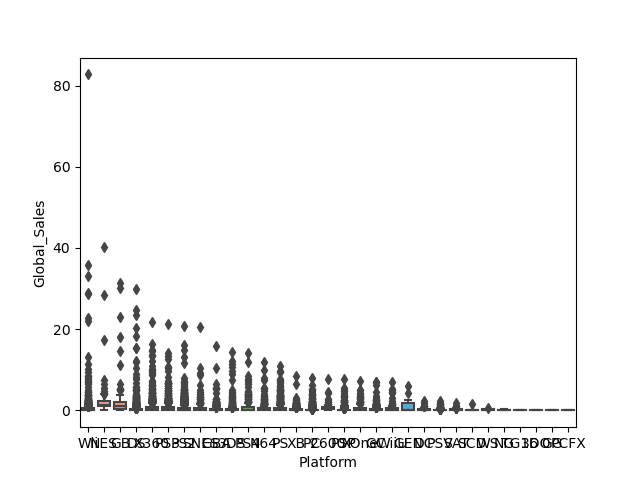

In [24]:
sns.boxplot(data=games_df, x="Platform", y="Global_Sales")

In [26]:
ratings_df.rename({"game":"Name"},axis=1, inplace=True)

In [27]:
ratings_df.drop("Unnamed: 0", axis=1, inplace=True)

In [28]:
ratings_df

Name       Platform metascore user_score  \
0                              Wii Sports            wii    \n76\n        8.0   
1                          Mario Kart Wii            wii    \n82\n        8.4   
2                       Wii Sports Resort            wii    \n80\n        8.1   
3                   New Super Mario Bros.             ds    \n89\n        8.5   
4                                Wii Play            wii    \n58\n        6.5   
...                                   ...            ...       ...        ...   
7382                         Scurge: Hive             ds    \n70\n        7.4   
7383                             Catwoman           xbox    \n45\n        4.2   
7384                       Aquarium by DS             ds   \ntbd\n        tbd   
7385                         Ride to Hell       xbox-360    \n19\n        1.3   
7386  Mana Khemia: Alchemists of Al-Revis  playstation-2    \n69\n        8.1   

      release_date  positive_critics  neutral_critics  negative_critics  \
0     Nov 19, 2006                31               20                 0   
1     Apr 27, 2008                65                7                 1   
2     Jul 26, 2009                60               13                 0   
3     May 15, 2006                62                3                 0   
4     Feb 12, 2007                 2               31                 8   
...            ...               ...              ...               ...   
7382  Nov  1, 2006                13               14                 2   
7383  Jul 20, 2004                 1               11                21   
7384  Mar 14, 2008                 0                0                 1   
7385  Jun 25, 2013                 0                0                14   
7386  Apr  1, 2008                 8               12                 0   

     positive_users  neutral_users negative_users  \
0               105             40              3   
1               235             62             22   
2                62             15              4   
3               137             28              2   
4                32             27             15   
...             ...            ...            ...   
7382              0              1              0   
7383              0              1              2   
7384              0              1              0   
7385             19              3             92   
7386              8              0              2   

                                              developer  \
0        \n                    Nintendo                   
1        \n                    Nintendo                   
2        \n                    Nintendo                   
3        \n                    Nintendo                   
4        \n                    Nintendo                   
...                                                 ...   
7382  \n                    Orbital Media, Inc.     ...   
7383     \n                    EA Games                   
7384       \n                    Ertain                   
7385  \n                    Eutechnyx, Deep Silver  ...   
7386         \n                    Gust                   

             number_players rating  
0     No Online Multiplayer      E  
1                 Up to 12       E  
2                      1-4       E  
3     No Online Multiplayer      E  
4     No Online Multiplayer      E  
...                     ...    ...  
7382               1 Player   E10+  
7383               1 Player      T  
7384                    NaN      E  
7385  No Online Multiplayer      M  
7386               1 Player   E10+  

[7387 rows x 14 columns]

In [29]:
games_df.loc[games_df["Name"]=="Grand Theft Auto V"]

Rank                Name Platform    Year   Genre             Publisher  \
16      17  Grand Theft Auto V      PS3  2013.0  Action  Take-Two Interactive   
23      24  Grand Theft Auto V     X360  2013.0  Action  Take-Two Interactive   
44      45  Grand Theft Auto V      PS4  2014.0  Action  Take-Two Interactive   
197    198  Grand Theft Auto V     XOne  2014.0  Action  Take-Two Interactive   
1896  1898  Grand Theft Auto V       PC  2015.0  Action  Take-Two Interactive   

      NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
16        7.01      9.27      0.97         4.14         21.40  
23        9.63      5.31      0.06         1.38         16.38  
44        3.80      5.81      0.36         2.02         11.98  
197       2.66      2.01      0.00         0.41          5.08  
1896      0.36      0.64      0.00         0.08          1.08

In [30]:
print(games_df["Platform"].value_counts().index.tolist())
print(ratings_df["Platform"].value_counts().index.tolist())

['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB', 'GBA', 'GC', '3DS', 'PSV', 'PS4', 'N64', 'SNES', 'XOne', 'SAT', 'WiiU', '2600', 'NES', 'GB', 'DC', 'GEN', 'NG', 'SCD', 'WS', '3DO', 'TG16', 'GG', 'PCFX']
['playstation-2', 'xbox-360', 'playstation-3', 'ds', 'wii', 'xbox', 'psp', 'gamecube', 'game-boy-advance', 'playstation-4', 'playstation', 'playstation-vita', 'wii-u', 'nintendo-64', 'dreamcast']


In [31]:
platform_conversions = {
    'playstation-2': "PS2",
    'xbox-360': "X360",
    'playstation-3': "PS3",
    'ds': "DS",
    'wii': "Wii",
    'xbox': "XB", 
    'psp': "PSP",
    'gamecube': "GC",
    'game-boy-advance': "GBA",
    'playstation-4': "PS4",
    'playstation':"PS",
    'playstation-vita':"PSV",
    'wii-u':"WiiU",
    'nintendo-64':"N64",
    'dreamcast':"DC"
}

ratings_df["Platform"] = ratings_df["Platform"].map(lambda x: platform_conversions[x])
ratings_df

Name Platform metascore user_score  \
0                              Wii Sports      Wii    \n76\n        8.0   
1                          Mario Kart Wii      Wii    \n82\n        8.4   
2                       Wii Sports Resort      Wii    \n80\n        8.1   
3                   New Super Mario Bros.       DS    \n89\n        8.5   
4                                Wii Play      Wii    \n58\n        6.5   
...                                   ...      ...       ...        ...   
7382                         Scurge: Hive       DS    \n70\n        7.4   
7383                             Catwoman       XB    \n45\n        4.2   
7384                       Aquarium by DS       DS   \ntbd\n        tbd   
7385                         Ride to Hell     X360    \n19\n        1.3   
7386  Mana Khemia: Alchemists of Al-Revis      PS2    \n69\n        8.1   

      release_date  positive_critics  neutral_critics  negative_critics  \
0     Nov 19, 2006                31               20                 0   
1     Apr 27, 2008                65                7                 1   
2     Jul 26, 2009                60               13                 0   
3     May 15, 2006                62                3                 0   
4     Feb 12, 2007                 2               31                 8   
...            ...               ...              ...               ...   
7382  Nov  1, 2006                13               14                 2   
7383  Jul 20, 2004                 1               11                21   
7384  Mar 14, 2008                 0                0                 1   
7385  Jun 25, 2013                 0                0                14   
7386  Apr  1, 2008                 8               12                 0   

     positive_users  neutral_users negative_users  \
0               105             40              3   
1               235             62             22   
2                62             15              4   
3               137             28              2   
4                32             27             15   
...             ...            ...            ...   
7382              0              1              0   
7383              0              1              2   
7384              0              1              0   
7385             19              3             92   
7386              8              0              2   

                                              developer  \
0        \n                    Nintendo                   
1        \n                    Nintendo                   
2        \n                    Nintendo                   
3        \n                    Nintendo                   
4        \n                    Nintendo                   
...                                                 ...   
7382  \n                    Orbital Media, Inc.     ...   
7383     \n                    EA Games                   
7384       \n                    Ertain                   
7385  \n                    Eutechnyx, Deep Silver  ...   
7386         \n                    Gust                   

             number_players rating  
0     No Online Multiplayer      E  
1                 Up to 12       E  
2                      1-4       E  
3     No Online Multiplayer      E  
4     No Online Multiplayer      E  
...                     ...    ...  
7382               1 Player   E10+  
7383               1 Player      T  
7384                    NaN      E  
7385  No Online Multiplayer      M  
7386               1 Player   E10+  

[7387 rows x 14 columns]

In [32]:
import re
ratings_df["metascore"] = ratings_df["metascore"].str.extract("\n(\d+)\n", flags=re.IGNORECASE)

In [41]:
ratings_df["developer"] = ratings_df["developer"].str.extract("\s*\n\s*(\w+)\s*\n*\s*", flags=re.IGNORECASE)

In [42]:
ratings_df.drop("developer2", axis=1, inplace=True)

In [44]:
ratings_df["number_players"].value_counts()

1 Player                 1221
No Online Multiplayer    1100
1-2                       917
1-4                       690
Up to 4                   243
2  Online                 240
Up to 8                   189
2                         172
4  Online                 153
1-8                       120
Up to 16                   84
8  Online                  82
Up to 12                   77
Up to 6                    53
Up to 10                   50
16  Online                 48
6  Online                  33
1-6                        29
1-16                       28
10  Online                 20
Up to 18                   17
1-3                        17
Up to 24                   17
Up to 22                   16
1-5                        15
24  Online                 15
Massively Multiplayer      12
Up to 20                   11
12  Online                 11
Up to 3                     7
32  Online                  7
14  Online                  6
Online Multiplayer          6
Up to 14  

In [49]:
new_df = pd.merge(games_df, ratings_df, how="inner", left_on=["Name","Platform"], right_on=["Name", "Platform"])
new_df

Rank                                 Name Platform    Year  \
0         1                           Wii Sports      Wii  2006.0   
1         3                       Mario Kart Wii      Wii  2008.0   
2         4                    Wii Sports Resort      Wii  2009.0   
3         7                New Super Mario Bros.       DS  2006.0   
4         8                             Wii Play      Wii  2006.0   
...     ...                                  ...      ...     ...   
7387  12688                         Scurge: Hive       DS  2006.0   
7388  12689                             Catwoman       XB  2004.0   
7389  12693                       Aquarium by DS       DS  2008.0   
7390  12695                         Ride to Hell     X360  2013.0   
7391  12697  Mana Khemia: Alchemists of Al-Revis      PS2  2007.0   

             Genre             Publisher  NA_Sales  EU_Sales  JP_Sales  \
0           Sports              Nintendo     41.49     29.02      3.77   
1           Racing              Nintendo     15.85     12.88      3.79   
2           Sports              Nintendo     15.75     11.01      3.28   
3         Platform              Nintendo     11.38      9.23      6.50   
4             Misc              Nintendo     14.03      9.20      2.93   
...            ...                   ...       ...       ...       ...   
7387        Action       SouthPeak Games      0.05      0.00      0.00   
7388        Action       Electronic Arts      0.04      0.01      0.00   
7389    Simulation         Mercury Games      0.05      0.00      0.00   
7390        Racing           Deep Silver      0.04      0.01      0.00   
7391  Role-Playing  Nippon Ichi Software      0.03      0.02      0.00   

      Other_Sales  ...  release_date positive_critics neutral_critics  \
0            8.46  ...  Nov 19, 2006               31              20   
1            3.31  ...  Apr 27, 2008               65               7   
2            2.96  ...  Jul 26, 2009               60              13   
3            2.90  ...  May 15, 2006               62               3   
4            2.85  ...  Feb 12, 2007                2              31   
...           ...  ...           ...              ...             ...   
7387         0.00  ...  Nov  1, 2006               13              14   
7388         0.00  ...  Jul 20, 2004                1              11   
7389         0.00  ...  Mar 14, 2008                0               0   
7390         0.00  ...  Jun 25, 2013                0               0   
7391         0.01  ...  Apr  1, 2008                8              12   

     negative_critics  positive_users  neutral_users  negative_users  \
0                   0             105             40               3   
1                   1             235             62              22   
2                   0              62             15               4   
3                   0             137             28               2   
4                   8              32             27              15   
...               ...             ...            ...             ...   
7387                2               0              1               0   
7388               21               0              1               2   
7389                1               0              1               0   
7390               14              19              3              92   
7391                0               8              0               2   

      developer         number_players rating  
0      Nintendo  No Online Multiplayer      E  
1      Nintendo              Up to 12       E  
2      Nintendo                   1-4       E  
3      Nintendo  No Online Multiplayer      E  
4      Nintendo  No Online Multiplayer      E  
...         ...                    ...    ...  
7387    Orbital               1 Player   E10+  
7388         EA               1 Player      T  
7389     Ertain                    NaN      E  
7390  Eutechnyx  No Online Multiplayer      M  
7391       Gust    

In [95]:
new_df.iloc[:,6:]

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales platform  \
0         41.49     29.02      3.77         8.46         82.74      NaN   
1         29.08      3.58      6.81         0.77         40.24      NaN   
2         15.85     12.88      3.79         3.31         35.82      NaN   
3         15.75     11.01      3.28         2.96         33.00      NaN   
4         11.27      8.89     10.22         1.00         31.37      NaN   
...         ...       ...       ...          ...           ...      ...   
16593      0.01      0.00      0.00         0.00          0.01      NaN   
16594      0.01      0.00      0.00         0.00          0.01      NaN   
16595      0.00      0.00      0.00         0.00          0.01      NaN   
16596      0.00      0.01      0.00         0.00          0.01      NaN   
16597      0.01      0.00      0.00         0.00          0.01      NaN   

      developer genre number_players rating release_date  positive_critics  \
0           NaN   NaN            NaN    NaN          NaN               NaN   
1           NaN   NaN            NaN    NaN          NaN               NaN   
2           NaN   NaN            NaN    NaN          NaN               NaN   
3           NaN   NaN            NaN    NaN          NaN               NaN   
4           NaN   NaN            NaN    NaN          NaN               NaN   
...         ...   ...            ...    ...          ...               ...   
16593       NaN   NaN            NaN    NaN          NaN               NaN   
16594       NaN   NaN            NaN    NaN          NaN               NaN   
16595       NaN   NaN            NaN    NaN          NaN               NaN   
16596       NaN   NaN            NaN    NaN          NaN               NaN   
16597       NaN   NaN            NaN    NaN          NaN               NaN   

       neutral_critics  negative_critics  positive_users  neutral_users  \
0                  NaN               NaN             NaN            NaN   
1                  NaN               NaN             NaN            NaN   
2                  NaN               NaN             NaN            NaN   
3                  NaN               NaN             NaN            NaN   
4                  NaN               NaN             NaN            NaN   
...                ...               ...             ...            ...   
16593              NaN               NaN             NaN            NaN   
16594              NaN               NaN             NaN            NaN   
16595              NaN               NaN             NaN            NaN   
16596              NaN               NaN             NaN            NaN   
16597              NaN               NaN             NaN            NaN   

       negative_users  metascore  user_score  
0                 NaN        NaN         NaN  
1                 NaN        NaN         NaN  
2                 NaN        NaN         NaN  
3                 NaN        NaN         NaN  
4                 NaN        NaN         NaN  
...               ...        ...         ...  
16593             NaN        NaN         NaN  
16594             NaN        NaN         NaN  
16595             NaN        NaN         NaN  
16596             NaN        NaN         NaN  
16597             NaN        NaN         NaN  

[16598 rows x 19 columns]

In [92]:
new_df.columns.tolist()

['Rank',
 'Name',
 'Platform',
 'Year',
 'Genre',
 'Publisher',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales',
 'platform',
 'developer',
 'genre',
 'number_players',
 'rating',
 'release_date',
 'positive_critics',
 'neutral_critics',
 'negative_critics',
 'positive_users',
 'neutral_users',
 'negative_users',
 'metascore',
 'user_score']

In [91]:
# Gather all games for each platform that there is no rating data for.
no_rating_df = new_df.loc[new_df["release_date"].isnull()]
no_rating_df.to_csv("../Resources/games_to_get_ratings.csv")


In [21]:
new_df[new_df["Name"]=="Grand Theft Auto V"]

Rank                Name Platform    Year   Genre             Publisher  \
1     45  Grand Theft Auto V      PS4  2014.0  Action  Take-Two Interactive   
89  1898  Grand Theft Auto V       PC  2015.0  Action  Take-Two Interactive   

    NA_Sales  EU_Sales  JP_Sales  Other_Sales  ...  rating  release_date  \
1       3.80      5.81      0.36         2.02  ...       M  Nov 18, 2014   
89      0.36      0.64      0.00         0.08  ...       M  Apr 14, 2015   

   positive_critics neutral_critics negative_critics positive_users  \
1                66               0                0            369   
89               56               1                0            407   

   neutral_users  negative_users  metascore  user_score  
1             71              69         97          83  
89           108             250         96          77  

[2 rows x 25 columns]

In [22]:
all_consoles_games_df = games_df.groupby("Name").sum().drop(["Rank","Year"],axis=1).sort_values("Global_Sales", ascending=False)

In [23]:
all_consoles_games_df

NA_Sales  EU_Sales  JP_Sales  \
Name                                                                           
Wii Sports                                         41.49     29.02      3.77   
Grand Theft Auto V                                 23.46     23.04      1.39   
Super Mario Bros.                                  32.48      4.88      6.96   
Tetris                                             26.17      2.95      6.03   
Mario Kart Wii                                     15.85     12.88      3.79   
...                                                  ...       ...       ...   
WinBack 2: Project Poseidon                         0.01      0.01      0.00   
Super Robot Taisen XO                               0.00      0.00      0.01   
Dragon Quest X: All in One Package                  0.00      0.00      0.01   
Deus Ex                                             0.00      0.01      0.00   
Junjou Romanchika: Koi no Doki Doki Daisakusen      0.00      0.00      0.01   

                                                Other_Sales  Global_Sales  
Name                                                                       
Wii Sports                                             8.46         82.74  
Grand Theft Auto V                                     8.03         55.92  
Super Mario Bros.                                      0.99         45.31  
Tetris                                                 0.69         35.84  
Mario Kart Wii                                         3.31         35.82  
...                                                     ...           ...  
WinBack 2: Project Poseidon                            0.00          0.01  
Super Robot Taisen XO                                  0.00          0.01  
Dragon Quest X: All in One Package                     0.00          0.01  
Deus Ex                                                0.00          0.01  
Junjou Romanchika: Koi no Doki Doki Daisakusen         0.00          0.01  

[11493 rows x 5 columns]

In [24]:
sales_by_platform = games_df.groupby("Platform").sum().drop(["Rank","Year"],axis=1).sort_values("Global_Sales",ascending=False)

In [25]:
# Should we include all the platforms, or only more recent ones since we will be trying
# to predict sales on only the most recent consoles and the market has changed quite a bit.
# For example, the growth of the digital sales market.
sales_by_platform

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Platform                                                         
PS2         583.84    339.29    139.20       193.44       1255.64
X360        601.05    280.58     12.43        85.54        979.96
PS3         392.26    343.71     79.99       141.93        957.84
Wii         507.71    268.38     69.35        80.61        926.71
DS          390.71    194.65    175.57        60.53        822.49
PS          336.51    213.60    139.82        40.91        730.66
GBA         187.54     75.25     47.33         7.73        318.50
PSP         108.99     68.25     76.79        42.19        296.28
PS4          96.80    123.70     14.30        43.36        278.10
PC           93.28    139.68      0.17        24.86        258.82
XB          186.69     60.95      1.38         8.72        258.26
GB          114.32     47.82     85.12         8.20        255.45
NES         125.94     21.15     98.65         5.31        251.07
3DS          78.87     58.52     97.35        12.63        247.46
N64         139.02     41.06     34.22         4.38        218.88
SNES         61.23     19.04    116.55         3.22        200.05
GC          133.46     38.71     21.58         5.18        199.36
XOne         83.19     45.65      0.34        11.92        141.06
2600         90.60      5.47      0.00         0.91         97.08
WiiU         38.32     24.23     12.79         6.45         81.86
PSV          16.20     16.33     20.96         8.45         61.93
SAT           0.72      0.54     32.26         0.07         33.59
GEN          19.27      5.52      2.67         0.89         28.36
DC            5.43      1.69      8.56         0.27         15.97
SCD           1.00      0.36      0.45         0.05          1.87
NG            0.00      0.00      1.44         0.00          1.44
WS            0.00      0.00      1.42         0.00          1.42
TG16          0.00      0.00      0.16         0.00          0.16
3DO           0.00      0.00      0.10         0.00          0.10
GG            0.00      0.00      0.04         0.00          0.04
PCFX          0.00      0.00      0.03         0.00          0.03

In [26]:
# Create handheld column
handheld_platforms = ["WS", "PSV", "3DS", "GB", "PSP", "GBA", "DS", "GG", "SCD","PSV"]
at_home_platforms = ["PCFX", "3DO","TG16", "DC", "SAT", "WiiU", "2600", "XOne","GC", "SNES", "N64",
                    "NES", "XB", "PC", "PS4","PS", "Wii", "PS3","X360","PS2", "GEN","NG",]

In [27]:
# Create deprecated console column. "No longer in production"
# Suspect, should not be in deprecated_consoles list: ["PSV", "3DS", "Wii",]
# "GG" is for "Sega Game Gear", "NG" is for "Neo Geo" arcades, "SCD" is for 
# "Nintendo Suplemental Computing Device" and "GEN" is for "Sega Genesis"
# I Placed NG in the deprecated consoles list because arcade games are not relevant to how we will use the data. Will consider deleting it entirely.
deprecated_consoles = ["PCFX", "3DO","TG16","WS", "DC", "SAT", "PSV", "2600","GC", "SNES", "N64", "3DS",
                      "NES","GB","XB", "PSP", "GBA","PS", "DS", "Wii","PS3","X360","PS2", "GEN", "NG","GG"]



In [29]:
games_df.loc[games_df["Platform"]=="GEN"]

Rank                                               Name Platform  \
143      144                               Sonic the Hedgehog 2      GEN   
254      255                                 Sonic the Hedgehog      GEN   
564      565                                      Mortal Kombat      GEN   
588      589                                    Streets of Rage      GEN   
827      829                                            NBA Jam      GEN   
952      954                                   Sonic & Knuckles      GEN   
991      993                               Sonic the Hedgehog 3      GEN   
1099    1101       Street Fighter II': Special Champion Edition      GEN   
1372    1374                             Disney's The Lion King      GEN   
1458    1460                                    Mortal Kombat 3      GEN   
1841    1843                         NBA Jam Tournament Edition      GEN   
6473    6475                                      Virtua Racing      GEN   
7910    7912                                   Shining Force II      GEN   
8908    8910                            Super Street Fighter II      GEN   
9004    9006     Lunar 2: Eternal Blue(sales, but wrong system)      GEN   
9561    9563                                     Gunstar Heroes      GEN   
9796    9798                                   Ecco the Dolphin      GEN   
11541  11543                   Yuu Yuu Hakusho: Makyo Toitsusen      GEN   
11640  11642                Dragon Slayer: The Legend of Heroes      GEN   
11951  11953                            Ecco: The Tides of Time      GEN   
12065  12067  Street Fighter II': Special Champion Edition (...      GEN   
12231  12233                                  Streets of Rage 3      GEN   
12945  12947                                    Dynamite Headdy      GEN   
13311  13313                                       Beyond Oasis      GEN   
14034  14036                             J-League Pro Striker 2      GEN   
14093  14095                             Castlevania Bloodlines      GEN   
14416  14419                            Puzzle & Action: Tant-R      GEN   

         Year         Genre                     Publisher  NA_Sales  EU_Sales  \
143    1992.0      Platform                          Sega      4.47      1.20   
254    1991.0      Platform                          Sega      3.03      0.91   
564    1992.0      Fighting           Arena Entertainment      1.95      0.63   
588    1990.0        Action                          Sega      1.86      0.55   
827    1992.0        Sports           Arena Entertainment      1.75      0.25   
952    1994.0      Platform                          Sega      1.24      0.43   
991    1994.0      Platform                          Sega      1.02      0.47   
1099   1992.0      Fighting                          Sega      1.00      0.30   
1372   1994.0      Platform            Virgin Interactive      0.97      0.37   
1458   1994.0      Fighting         Acclaim Entertainment      1.03      0.27   
1841   1994.0        Sports         Acclaim Entertainment      0.95      0.14   
6473   1994.0        Racing                          Sega      0.00      0.00   
7910   1993.0      Strategy                          Sega      0.00      0.00   
8908   1993.0      Fighting                        Capcom      0.00      0.00   
9004   1994.0  Role-Playing                     Game Arts      0.00      0.00   
9561   1992.0       Shooter                          Sega      0.00      0.00   
9796   1992.0     Adventure                          Sega      0.00      0.00   
11541  1994.0      Fighting                          Sega      0.00      0.00   
11640  1994.0  Role-Playing                          Sega      0.00      0.00   
11951  1993.0     Adventure                          Sega      0.00      0.00   
12065  1993.0        Action                        Capcom      0.00      0.00   
12231  1993.0        Action                          Sega      0.00      0.00   
12945  1993.0   

In [30]:
# creating a column for whether the game was handheld or not 
games_df["is_handheld"] = games_df["Platform"].apply(lambda x: "yes" if x in handheld_platforms else "no")

In [31]:
games_df

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16593  2002.0      Platform       Kemco      0.01      0.00      0.00   
16594  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16595  2008.0        Racing  Activision      0.00      0.00      0.00   
16596  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16597  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales is_handheld  
0             8.46         82.74          no  
1             0.77         40.24          no  
2             3.31         35.82          no  
3             2.96         33.00          no  
4             1.00         31.37         yes  
...            ...           ...         ...  
16593         0.00          0.01         yes  
16594         0.00          0.01          no  
16595         0.00          0.01          no  
16596         0.00          0.01         yes  
16597         0.00          0.01         yes  

[16598 rows x 12 columns]

In [32]:
# creating a column for whether the game is deprecated or not
games_df["is_deprecated"] = games_df["Platform"].apply(lambda x: "yes" if x in deprecated_consoles else "no")

In [98]:
games_df["Platform"].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [112]:
new_df = ~games_df.Platform.isin(deprecated_consoles)
games_df[new_df]

Rank                           Name Platform    Year       Genre  \
33        34      Call of Duty: Black Ops 3      PS4  2015.0     Shooter   
44        45             Grand Theft Auto V      PS4  2014.0      Action   
77        78                        FIFA 16      PS4  2015.0      Sports   
83        84                     The Sims 3       PC  2009.0  Simulation   
92        93   Star Wars Battlefront (2015)      PS4  2015.0     Shooter   
...      ...                            ...      ...     ...         ...   
16570  16573  Farming 2017 - The Simulation      PS4  2016.0  Simulation   
16576  16579              Rugby Challenge 3     XOne  2016.0      Sports   
16577  16580                      Damnation       PC  2009.0     Shooter   
16585  16588                         Breach       PC  2011.0     Shooter   
16591  16594            Myst IV: Revelation       PC  2004.0   Adventure   

                  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
33               Activision      5.77      5.81      0.35         2.31   
44     Take-Two Interactive      3.80      5.81      0.36         2.02   
77          Electronic Arts      1.11      6.06      0.06         1.26   
83          Electronic Arts      0.98      6.42      0.00         0.71   
92          Electronic Arts      2.93      3.29      0.22         1.23   
...                     ...       ...       ...       ...          ...   
16570     UIG Entertainment      0.00      0.01      0.00         0.00   
16576  Alternative Software      0.00      0.01      0.00         0.00   
16577           Codemasters      0.00      0.01      0.00         0.00   
16585             Destineer      0.01      0.00      0.00         0.00   
16591               Ubisoft      0.01      0.00      0.00         0.00   

       Global_Sales  
33            14.24  
44            11.98  
77             8.49  
83             8.11  
92             7.67  
...             ...  
16570          0.01  
16576          0.01  
16577          0.01  
16585          0.01  
16591          0.01  

[1658 rows x 11 columns]

In [104]:
deprecated_consoles

['PCFX',
 '3DO',
 'TG16',
 'WS',
 'DC',
 'SAT',
 'PSV',
 '2600',
 'GC',
 'SNES',
 'N64',
 '3DS',
 'NES',
 'GB',
 'XB',
 'PSP',
 'GBA',
 'PS',
 'DS',
 'Wii',
 'PS3',
 'X360',
 'PS2',
 'GEN',
 'NG',
 'GG']

In [114]:
games_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [115]:
games_df

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16593  2002.0      Platform       Kemco      0.01      0.00      0.00   
16594  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16595  2008.0        Racing  Activision      0.00      0.00      0.00   
16596  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16597  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16593         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  
16597         0.00          0.01  

[16598 rows x 11 columns]